# Principle Component Analysis

PCA uses dimensionality reduction algorithm which derives new dimensions or features from the existning ones

In [72]:
import numpy as np

In [73]:
lst = [1,2,4,5,6,5,4]

In [74]:
def mean(x):
    return sum(x) / len(x)

In [75]:
def standard_derivation(x):
    n = len(x)
    mean_x = sum(x) / n
    variance = sum((i - mean_x) ** 2 for i in x) / n
    return variance ** 0.5

In [76]:
def median(x):
    x = sorted(x)
    n = len(x)
    mid = x // 2
    
    if n % 2 == 0:
        return(x[mid - 1] + x[mid]) / 2
    else:
        return x[mid]

In [77]:
def standardize_data(data):
    data = np.array(data)
    mean_vec = np.mean(data, axis=0)
    std_vec = np.std(data, axis=0)
    return (data - mean_vec) / std_vec


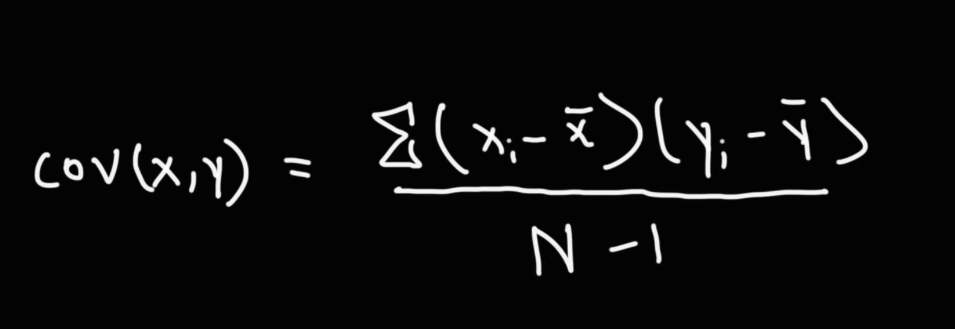

In [78]:
def covariance(x, y):
    if len(x) != len(y):
        raise ValueError("The lengths do not match")
    
    x_mu = mean(x)
    y_mu = mean(y)
    n = len(x)
    
    return sum((x[i] - x_mu) * (y[i] - y_mu) for i in range(n)) / n

In [79]:
def covariance_matrix(data):
    n_features = len(data[0])
    features = [[row[i] for row in data] for i in range(n_features)]
    cov_matrix = []
    for i in range(n_features):
        row = []
        for j in range(n_features):
            row.append(covariance(features[i], features[j]))
        cov_matrix.append(row)
    return np.array(cov_matrix)

In [80]:
def eigenvalues(x):
    eig_vals, eig_vecs = np.linalg.eig(x)
    return eig_vals, eig_vecs

In [81]:
def sort_eigenpairs(X):
    # Indices of sorted eigenvalues (descending)
    eig_vals, eig_vecs = eigenvalues(X)
    idx = np.argsort(eig_vals)[::-1]
    sorted_eig_vals = eig_vals[idx]
    sorted_eig_vecs = eig_vecs[:, idx]
    return sorted_eig_vals, sorted_eig_vecs

In [82]:
def select_top_k_components(eig_vecs, k):
    return eig_vecs[:, :k]  # shape = (n_features, k)

In [83]:
def project_data(centered_data, eig_vecs, k):
    top_k_vecs = eig_vecs[:, :k]
    return np.dot(centered_data, top_k_vecs)

In [84]:
import random

In [85]:
np.random.seed(42)
data = np.random.rand(100, 5)
print(data[:5])

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]]


In [86]:
centered_data = standardize_data(data)
cov_mat = covariance_matrix(data.tolist())  # Convert numpy array to list if needed
eig_vals, eig_vecs = sort_eigenpairs(cov_mat)
projected = project_data(data, eig_vecs, k=3)

In [87]:
print("Projected data shape:", projected.shape)  # (100, 2)
print(projected[:5])  # First 5 projected points

Projected data shape: (100, 3)
[[-0.30413659  0.47090449  0.865031  ]
 [ 0.18618313  0.88794765  0.00819277]
 [-0.67049113  0.58281758  0.5993559 ]
 [-0.00236547  0.45556683  0.2848709 ]
 [ 0.40644868  0.21848851  0.22918429]]
